**Оглавление:**
1. [Изучение данных из файлов](#step1)  
2. [Предобработка данных](#step2) 
3. [Подготовка пользовательских данных](#step3)
4. [Расчёты по пользователю](#step4)
5. [Анализ данных](#step5)
6. [Проверка гипотез](#step6)
7. [Общий вывод](#step7)

<a id="step1"></a>
## Изучение данных из файлов

Обновим версию библиотеки Seaborn:

In [1]:
!pip install -U seaborn

Имортируем необходимые библиотеки:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

Прочитаем файлы с данными:

In [3]:
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
sms= pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

Рассмотрим по отдельности каждую таблицу. Напишем функцию для вывода инфромации о таблице и первых её 10 строк:

In [4]:
def description(df):
    display(df.head(10), df.info())

### Таблица calls (информация о звонках)

Рассмотрим общую информацию о таблице `calls` и её первые 10 строк: 

In [5]:
description(calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


None

Таблица состоит из 202607 строк и 4 столбцов.

Видим, что в таблице отсутствуют пропущенные значения. В таблице имеются столбцы типа int, float, object. Столбец `call_date` имеет тип object, для дальнейшего исследование необходимо будет изменить формат на datetime.

Рассмотрим подробней столбцы с числовыми данными:

In [6]:
calls.describe() 

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Видим, что в столбце `duration` минимальная продолжительность звонка - 0 минут. Вероятнее всего, таким образом обозначены пропущенные вызовы, т.е. удалять эти значения не стоит.

### Таблица internet (информация об интернет-сессиях)

Рассмотрим общую информацю о таблице `internet` и её первые 10 строк: 

In [7]:
description(internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


None

Таблица состоит из 149396 строк и 5 столбцов.

Видим, что в таблице отсутствуют пропущенные значения. В таблице имеются столбцы типа int, float, object. Столбец `session_date` имеет тип object, для дальнейшего исследование необходимо будет изменить формат на datetime.

Столбец `Unnamed: 0` дублирует столбец с индексами и не несет никакой информации. В дальнейшем можем от него избавиться. 

Рассмотрим подробней столбцы с числовыми данными:

In [8]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Видим, что в столбце `mb_used` минимальное количество трафика - 0 Мб. Возможно, таким образом обозначены пропуски, которые необходимо будет обработать в дальнейшнем.

### Таблица  messages (информация о сообщениях)

Рассмотрим общую информацию о таблице `messages` и её первые 10 строк: 

In [9]:
description(sms)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


None

Таблица состоит из 123036 строк и 3 столбцов.

Видим, что в таблице отсутствуют пропущенные значения. В таблице имеются столбцы типа int и object. Столбец `message_date` имеет тип object, для дальнейшего исследование необходимо будет изменить формат на datetime.


### Таблица tariffs (информация о тарифах)

Рассмотрим общую информацию о таблице `tariffs` и её первые 10 строк: 

In [10]:
description(tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


None

Таблица состоит из 2 строк и 8 столбцов.

Видим, что в таблице отсутствуют пропущенные значения. В таблице имеются столбцы типа int и object. 


### Таблица users (информация о пользователях)

Рассмотрим общую информацю о таблице `users` и её первые 10 строк: 

In [11]:
description(users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


None

Таблица состоит из 500 строк (соответствует заявленному количеству пользователей в исследовании) и 8 столбцов.

Видим, что в таблице есть пропущенные значения в столбце `churn_date`. Знаем из условий, что если значение в этом столбце пропущено, то тариф ещё действовал на момент выгрузки данных. Поскольку мы не исследуем продолжительность пользования тарифом, заполнять эти пропуски необходимости нет.

Рассмотрим подробней столбцы с числовыми данными:

In [12]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Видим, что минимальный возраст пользователя - 18 лет, несовершеннолетних в нашей таблице нет.

**Вывод**

В нашем распоряжении 5 таблиц, в которых содержатся данные об отдельных звонках, сообщениях, интернет трафике, а также условия двух тарифов и данные о 500 клиентах оператора (их фамилия, имя, возраст, город проживания и т.п.).

При рассмотрении таблиц мы выявили следующие моменты, требующие корректировки:

* В таблицах `calls`, `messages`, `internet` и `users` необходимо изменить тип данных для столбцов, содержащих в себе даты, на тип datetime;

* В таблице `internet` содержится лишний столбец `Unnamed: 0`, который необходимо удалить;

* В таблице `internet` обнаружены нулевые значения, которые необходимо обработать;

* В таблице `calls` обнаружены нулевые значения, но мы принимаем их за пропущенные вызовы, и оставляем как есть;

* В таблице `users` обнаружены пропущенные значения, но, зная из условия, что это не случайные пропуски, заполнять их мы не будем.

Для дальнейшего исследования нам потребуется провести предобработку данных.

<a id="step2"></a>
## Предобработка данных

### Замена типа данных

Приведем данные в столбцах `call_date`, `session_date`, `message_date` и `reg_date` к типу datetime:

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])
sms['message_date'] = pd.to_datetime(sms['message_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])

**Вывод**

Мы привели данные в 4 столбцах к формату datetine. Это понадобится нам для дальнейших расчетов.

### Исправление ошибок в данных

В таблице `calls` мы обнаружили нулевые значения, но пришли к заключению, что таким образом отображатся пропущенные вызовы.

Также мы обнаружили, что в таблице `internet` присутствуют нулевые значения в столбце `mb_used`. Оценим их количество:

In [14]:
internet[internet['mb_used'] == 0].count()

Unnamed: 0      19598
id              19598
mb_used         19598
session_date    19598
user_id         19598
dtype: int64

Из 149396 мы имеем 19598 нулевых значений, что составляет около 13% от всех данных.

Посмотрим, что из себя представляют ненулевые значения таблицы:

In [15]:
internet2 = internet[internet['mb_used'] > 0]
internet2.describe()

,Unnamed: 0,mb_used,user_id
count,129798.000000,129798.000000,129798.000000
mean,74978.644879,426.087210,1253.046318
std,43047.137838,255.596447,143.782672
min,0.000000,0.030000,1000.000000
25%,37675.250000,227.460000,1132.000000
50%,75253.000000,400.540000,1252.000000
75%,112247.750000,592.947500,1380.000000
max,149395.000000,1724.830000,1499.000000


Видим, что значение среднего сместилось с 370 до 426, а медианы - с 348 до 400.

Также рассмотрим динамику количества "нулевых" сессий по месяцам. Для этого создадим в таблице `internet` столбец `month`, в который внесем номер месяца, в который произведена интернет-сессия (этот столбец также понадобится нам для дальнешего исследования). Построим столбчатую диаграмму:

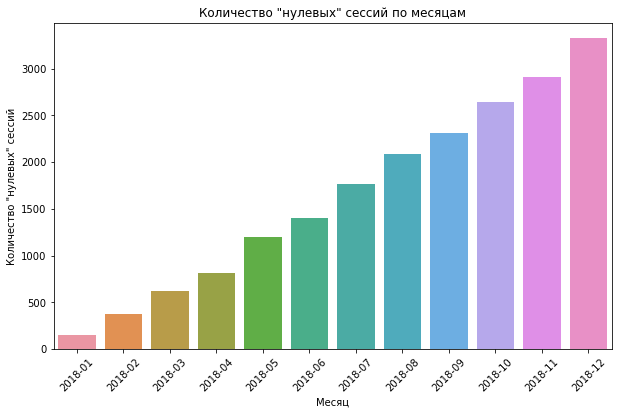

In [16]:
internet['month'] = internet['session_date'].dt.to_period('M')
null_sessions = internet[internet['mb_used'] == 0].groupby('month').agg({'mb_used':'count'}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=null_sessions, x='month', y='mb_used')
plt.xticks(rotation=45)
plt.xlabel('Месяц')
plt.ylabel('Количество "нулевых" сессий')
plt.title('Количество "нулевых" сессий по месяцам')
plt.show();

Также построим столбачтую диаграмму, чтобы посмотреть динамику количества "ненулевых" сессий по месяцам:

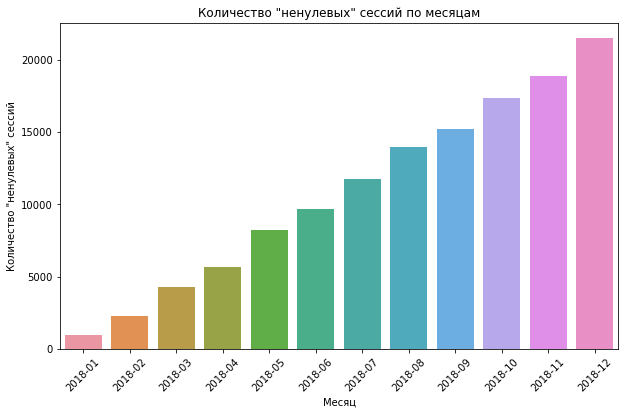

In [17]:
not_null_sessions = internet[internet['mb_used'] != 0].groupby('month').agg({'mb_used':'count'}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=not_null_sessions, x='month', y='mb_used')
plt.xticks(rotation=45)
plt.xlabel('Месяц')
plt.ylabel('Количество "ненулевых" сессий')
plt.title('Количество "ненулевых" сессий по месяцам')
plt.show();

Видим, что динамика количества нулевых значений по месяцам совпадает с общей динамикой количества сессий, т.е. тут никаких аномалий не выявлено.

Предположим, что нули указывают отдельные подключения пользователей к интернету, в течение трафик которых не тратился. В таком случае оставим нулевые значения не заполненными. 

**Вывод**

Мы выявили, что в таблицах `calls` и `internet` присутсвуют нулевые значения. В обоих случах мы оставили нулевые значения нетронутыми. 

Мы предположили, что нулевые значения в таблице `calls` указывают на непринятые вызовы, а в таблице `internet` - на подключения без использования трафика.

### Удаление лишнего столбца

Удалим ненужный столбец в таблице `internet`:

In [18]:
internet = internet.drop(columns = ['Unnamed: 0'],axis = 1)

**Вывод**

Мы удалили столбец `Unnamed: 0`, который дублировал индексы в таблице `internet`.

### Обработка дубликатов

Проверим, не появились ли в наших таблицах дубликаты после проведенной обработки данных:

In [19]:
display(calls.duplicated().sum(), internet.duplicated().sum(), sms.duplicated().sum(), users.duplicated().sum())

0

0

0

0

Дубликаты не обнаружены.

**Вывод**

Мы проверили 4 таблицы, в которых вносили изменения, на наличие дубликатов. Дубликатов обнаружено не было.

<a id="step3"></a>
## Подготовка пользовательских данных

### Таблица calls

Мы знаем, что по условиям оператора каждый звонок откругляется в большую сторону до 1 минуты. В таблице `calls` применим к столбцу `duration` откругление "вверх" до единиц: 

In [20]:
calls['duration'] = np.ceil(calls['duration'])

Создадим новый столбец `month`, в который внесем номер месяца, в котором был произведен звонок:

In [21]:
calls['month'] = calls['call_date'].dt.to_period('M')

Создадим сводную таблицу, в которой сгруппируем данные по user_id и месяцам. Просуммируем продолжительность звонков и посчитаем их количество:

In [22]:
calls_total = calls.pivot_table(index = ['user_id','month'], values ='duration', aggfunc=['sum', 'count'] )
calls_total.columns = ['calls_duration', 'calls_count']
calls_total

calls_duration  calls_count
user_id month                               
1000    2018-05           159.0           22
        2018-06           172.0           43
        2018-07           340.0           47
        2018-08           408.0           52
        2018-09           466.0           58
...                         ...          ...
1498    2018-10           247.0           41
1499    2018-09            70.0            9
        2018-10           449.0           68
        2018-11           612.0           74
        2018-12           492.0           69

[3174 rows x 2 columns]

### Таблица internet

Ранее мы уже добавили в таблицу дополнительный столбец `month`. Напомним, как выглядит эта таблица:

In [23]:
internet

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,2018-11
1,1000_1,1052.81,2018-09-07,1000,2018-09
2,1000_2,1197.26,2018-06-25,1000,2018-06
3,1000_3,550.27,2018-08-22,1000,2018-08
4,1000_4,302.56,2018-09-24,1000,2018-09
...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,2018-10
149392,1499_153,490.13,2018-12-14,1499,2018-12
149393,1499_154,0.00,2018-10-27,1499,2018-10
149394,1499_155,1246.32,2018-11-26,1499,2018-11


Создадим сводную таблицу, в которой сгруппируем данные по user_id и месяцам. Просуммируем продолжительность интернет-сессий:

In [24]:
internet_total = internet.pivot_table(index = ['user_id','month'], values ='mb_used', aggfunc='sum')
internet_total

mb_used
user_id month            
1000    2018-05   2253.49
        2018-06  23233.77
        2018-07  14003.64
        2018-08  14055.93
        2018-09  14568.91
...                   ...
1498    2018-10  20579.36
1499    2018-09   1845.75
        2018-10  17788.51
        2018-11  17963.31
        2018-12  13055.58

[3203 rows x 1 columns]

### Таблица messages

Создадим новый столбец `month`, в который внесем номер месяца, в котором было отправлено смс-сообщение:

In [25]:
sms['month'] = sms['message_date'].dt.to_period('M')

Создадим сводную таблицу, в которой сгруппируем данные по user_id и месяцам. Подсчитаем количество смс-сообщений, отправленных в каждом месяце:

In [26]:
sms_total = sms.pivot_table(index = ['user_id','month'], values ='id', aggfunc='count')
sms_total

id
user_id month      
1000    2018-05  22
        2018-06  60
        2018-07  75
        2018-08  81
        2018-09  57
...              ..
1498    2018-10  42
1499    2018-09  11
        2018-10  48
        2018-11  59
        2018-12  66

[2717 rows x 1 columns]

Видим, что в сводной таблице столбец с количеством сообщений назван `id`. Сменим название столбца на `messages`:

In [27]:
sms_total.columns = ['messages']
sms_total

messages
user_id month            
1000    2018-05        22
        2018-06        60
        2018-07        75
        2018-08        81
        2018-09        57
...                   ...
1498    2018-10        42
1499    2018-09        11
        2018-10        48
        2018-11        59
        2018-12        66

[2717 rows x 1 columns]

**Вывод**

Мы составили сводные таблицы, в которых подсчитали по каждому пользователю:

* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам.

<a id="step4"></a>
## Расчёты по пользователю

Объединим в одну таблицу данные, которые мы подготовили на предыдущем шаге:

In [28]:
month_activity = internet_total.join([calls_total, sms_total], how='outer')

month_activity

mb_used  calls_duration  calls_count  messages
user_id month                                                   
1000    2018-05   2253.49           159.0         22.0      22.0
        2018-06  23233.77           172.0         43.0      60.0
        2018-07  14003.64           340.0         47.0      75.0
        2018-08  14055.93           408.0         52.0      81.0
        2018-09  14568.91           466.0         58.0      57.0
...                   ...             ...          ...       ...
1498    2018-10  20579.36           247.0         41.0      42.0
1499    2018-09   1845.75            70.0          9.0      11.0
        2018-10  17788.51           449.0         68.0      48.0
        2018-11  17963.31           612.0         74.0      59.0
        2018-12  13055.58           492.0         69.0      66.0

[3214 rows x 4 columns]

Для дальнейшего объединения таблиц сбросим индексы:

In [29]:
month_activity = month_activity.reset_index()

In [30]:
month_activity.shape

(3214, 6)

In [31]:
month_activity.user_id.nunique()

498

Далее объединим созданную таблицу с таблицей `users`: 

In [32]:
users_month_activity = pd.merge(month_activity, users, how='left', on='user_id')
users_month_activity

,user_id,month,mb_used,calls_duration,calls_count,messages,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,2018-05,2253.49,159.0,22.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,2018-06,23233.77,172.0,43.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,2018-07,14003.64,340.0,47.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,2018-08,14055.93,408.0,52.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,2018-09,14568.91,466.0,58.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,2018-10,20579.36,247.0,41.0,42.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
3210,1499,2018-09,1845.75,70.0,9.0,11.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
3211,1499,2018-10,17788.51,449.0,68.0,48.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
3212,1499,2018-11,17963.31,612.0,74.0,59.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


И в завершении добавим в таблицу данные о тарифных планах из таблицы `tariff`:

In [33]:
total = pd.merge(users_month_activity, tariffs, how = 'left', left_on = 'tariff', right_on = 'tariff_name')
total

,user_id,month,mb_used,calls_duration,calls_count,messages,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,2018-05,2253.49,159.0,22.0,22.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,2018-06,23233.77,172.0,43.0,60.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,2018-07,14003.64,340.0,47.0,75.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,2018-08,14055.93,408.0,52.0,81.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,2018-09,14568.91,466.0,58.0,57.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,2018-10,20579.36,247.0,41.0,42.0,68,2018-10-25,Владикавказ,Всеволод,...,2018-07-19,smart,50,15360,500,550,200,3,3,smart
3210,1499,2018-09,1845.75,70.0,9.0,11.0,35,NaN,Пермь,Гектор,...,2018-09-27,smart,50,15360,500,550,200,3,3,smart
3211,1499,2018-10,17788.51,449.0,68.0,48.0,35,NaN,Пермь,Гектор,...,2018-09-27,smart,50,15360,500,550,200,3,3,smart
3212,1499,2018-11,17963.31,612.0,74.0,59.0,35,NaN,Пермь,Гектор,...,2018-09-27,smart,50,15360,500,550,200,3,3,smart


Проверим окончательную таблицу на наличие пропусков:

In [34]:
total.isna().sum()

user_id                     0
month                       0
mb_used                    11
calls_duration             40
calls_count                40
messages                  497
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
tariff_name                 0
dtype: int64

Видим, что в результате объединения образовались пропуски в столбцах `calls_duration`, `calls_count`, `mb_used` и `messages`.

Поскольку мы понимаем, что эти пропуски по сути являются обозначением "нулевой активности" пользователя, заполним их нулями:

In [35]:
columns = ['calls_duration', 'calls_count', 'mb_used', 'messages']

for col in columns:
    total[col] = total[col].fillna(0)


Напишем функцию, при помощи которой определим помесячную выручку с каждого пользователя:

In [36]:
def revenue(row):
    # присваиваем переменным значения строк из таблицы, соответствующих активности пользователей
    min_spent = row['calls_duration']
    mb_spent = row['mb_used']
    sms_spent = row['messages']
    # присваиваем значения, соответствующие тарифному плану
    min_incl = row['minutes_included']
    mb_incl = row['mb_per_month_included']
    sms_incl = row['messages_included']
    # присваиваем значение абонентской платы
    month_fee = row['rub_monthly_fee']
    # присваиваем значения тарификации сверх плана
    rub_per_min = row['rub_per_minute']
    rub_per_gb = row['rub_per_gb']
    rub_per_sms = row['rub_per_message']
    
    # объявим переменные, куда будем вносить данные в случае 
    # перерасхода минут, трафика и сообщений сверх тарифного плана
    overrun_min = 0
    overrun_gb = 0
    overrun_sms = 0
    
    # напишем цикл, в котором подсчитаем возможный перерасход минут, трафика и сообщений
    # сверх лимита и просуммируем его с ежемесячной абонентской платой
    if min_spent > min_incl:
        overrun_min = (min_spent - min_incl) * rub_per_min
    if mb_spent > mb_incl:
        overrun_gb = np.ceil((mb_spent - mb_incl) / 1024) * rub_per_gb
    if sms_spent > sms_incl:
        overrun_sms = (sms_spent - sms_incl) * rub_per_sms
    return month_fee + overrun_min + overrun_gb + overrun_sms

Применим написанную выше функцию к таблице `total` и внесем полученные данные о выручке с каждого клиента в новый столбец `total_income`. Выведем случайные 10 строк таблицы и проверим полученные значения:

In [37]:
total['total_income'] = total.apply(revenue, axis = 1)
total.sample(10)

,user_id,month,mb_used,calls_duration,calls_count,messages,age,churn_date,city,first_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,total_income
2650,1413,2018-10,26911.10,193.0,25.0,4.0,37,NaN,Новосибирск,Леон,...,smart,50,15360,500,550,200,3,3,smart,2950.0
1393,1218,2018-12,12283.42,378.0,57.0,16.0,71,NaN,Екатеринбург,Снежана,...,smart,50,15360,500,550,200,3,3,smart,550.0
1323,1207,2018-09,11084.43,530.0,69.0,25.0,57,NaN,Балашиха,Яна,...,smart,50,15360,500,550,200,3,3,smart,640.0
2755,1429,2018-01,2147.23,70.0,10.0,0.0,54,NaN,Санкт-Петербург,Джулия,...,smart,50,15360,500,550,200,3,3,smart,550.0
253,1040,2018-09,16263.28,254.0,30.0,0.0,23,NaN,Сочи,Юрий,...,smart,50,15360,500,550,200,3,3,smart,750.0
923,1146,2018-09,12840.32,424.0,60.0,90.0,72,NaN,Санкт-Петербург,Владислав,...,smart,50,15360,500,550,200,3,3,smart,670.0
1832,1290,2018-06,23089.56,452.0,61.0,0.0,68,NaN,Нижний Новгород,Арсений,...,smart,50,15360,500,550,200,3,3,smart,2150.0
638,1100,2018-11,17120.23,530.0,75.0,49.0,58,NaN,Санкт-Петербург,Руслан,...,smart,50,15360,500,550,200,3,3,smart,1040.0
2619,1408,2018-12,14368.30,541.0,85.0,4.0,53,NaN,Самара,Касьян,...,smart,50,15360,500,550,200,3,3,smart,673.0
1392,1218,2018-11,10648.30,353.0,55.0,15.0,71,NaN,Екатеринбург,Снежана,...,smart,50,15360,500,550,200,3,3,smart,550.0


In [38]:
total['total_income'].describe()

count    3214.000000
mean     1529.076229
std       798.251091
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: total_income, dtype: float64

На всякий случай еще раз проверим, не образовалось ли в нашей финальной таблице новых пропущенных значений:

In [39]:
total.isnull().sum()

user_id                     0
month                       0
mb_used                     0
calls_duration              0
calls_count                 0
messages                    0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
tariff_name                 0
total_income                0
dtype: int64

**Вывод**

Мы объединили несколько подготовленных таблиц в общую сводную таблицу `total`, в которой содержатся данные о сумме и продолжительности звонков, общем использованном трафике и количестве смс-сообщений, приходящихся на каждого пользователя по месяцам. 

Также в таблицу была добавлена расчитанная ежемесечная выручка с каждого пользователя.

Таким образом у нас подготовлены все необходимые данные для проведения анализа, вычисления статистических характеристик и проверки гипотез. 

<a id="step5"></a>
## Анализ данных

Для начала при помощи сводной таблицы посмотрим, какую прибыль принесли компании пользователи каждого из 2 тарифов:

In [40]:
total.pivot_table(index='tariff_name', values='total_income', aggfunc='sum')

,total_income
tariff_name,
smart,2875351.0
ultra,2039100.0


Пользователи тарифа "Смарт" принесли компании 2.8 млн. руб., а пользователи тарифа "Ультра" - 1,9 млн. руб.

Попробуем рассмотреть поведение разных пользователей, для чего создадим сводную таблицу с медианными значениями использованных минут, трафика и сообщений:

In [41]:
user_month_med = total.pivot_table(index=['user_id', 'tariff_name'],
                        values=['calls_duration', 'mb_used', 'messages'], 
                        aggfunc='median')
user_month_med

,,calls_duration,mb_used,messages
user_id,tariff_name,,,
1000,ultra,339.0,14312.420,65.0
1001,smart,422.0,16233.000,0.0
1002,smart,214.0,17580.100,11.0
1003,ultra,824.0,11356.890,83.0
1004,ultra,132.5,17810.530,154.5
...,...,...,...,...
1495,ultra,954.0,29363.000,82.0
1496,smart,524.0,24037.255,41.5
1497,smart,490.0,14156.080,17.0


Видим, что пользователи ведут себя очень по разному, например, совсем не отправляют сообщений или разговаривают более 900 минут в месяц.

Посчитаем среднее, медиану, дисперсию и стандартное отклонение для продолжительности звонков, использованного траффика и количества сообщений.

Создадим таблицу `tariffs_stat`, в которой посчитаем среднее количество, медиану, дисперсию и стандартное отклонение для звонков, траффика и смс-сообщений. В качестве индексов таблицы возьмем наименование тарифов:

In [42]:
tariffs_stat = total.pivot_table(index=['tariff_name'], 
                                  values=['calls_duration', 'mb_used', 'messages'], 
                                  aggfunc={'calls_duration': [np.mean, np.median, np.var, np.std],
                                           'mb_used': [np.mean, np.median, np.var, np.std],
                                           'messages': [np.mean, np.median, np.var, np.std]})
tariffs_stat.T.round()

tariff_name                 smart        ultra
calls_duration mean         418.0        527.0
               median       422.0        518.0
               std          190.0        318.0
               var        36219.0     100874.0
mb_used        mean       16208.0      19469.0
               median     16507.0      19308.0
               std         5870.0      10087.0
               var     34462496.0  101751014.0
messages       mean          33.0         49.0
               median        28.0         38.0
               std           28.0         48.0
               var          797.0       2285.0

При рассмотрении таблицы мы видим следующее:

* Средняя продолжительность разговоров в месяц (помним про возможные нули и поэтому смотрим медиану): смарт - 423 минуты, ультра - 528 минут.
* Среднее количество используемого трафика в месяц: смарт - 16 Гб, ультра - 19 Гб.
* Среднее количество отправленных смс-сообщений в месяц (снова помним, что бы заполнили много значений нулями, поэтому смотрим медиану): смарт - 28, ультра - 39.
* Дисперсии тарифа ультра больше, чем у тарифа смарт, это говорит нам о большем размахе значений.

По этим данным можно сделать вывод, что абоненты тарифа "Ультра" более активно пользуются услугами мобильного оператора, при этом в среднем не прибегая к услугам сверх тарифного лимита. Абоненты тарифа "Смарт" в среднем тоже укладываются в рамки тарифного лимита,  за исключением интернет трафика, который в среднем используется на 1 Гб больше тарифного лимита.  

Построим диаграммы размаха для звонков, трафика и количества смс-сообщений для двух тарифов:

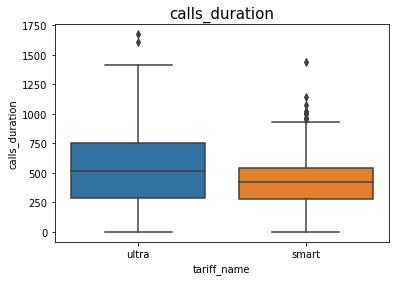

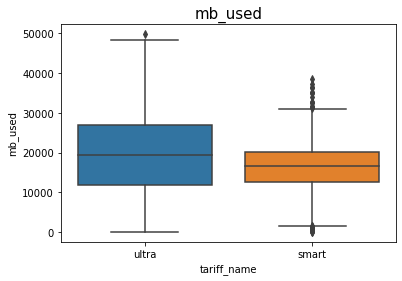

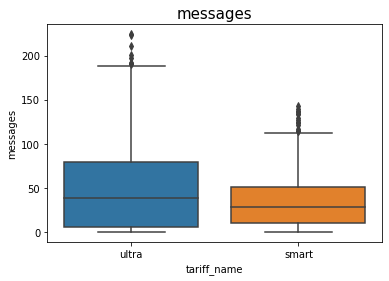

In [43]:
for column in ['calls_duration', 'mb_used', 'messages']:
    sns.boxplot(x='tariff_name', y=column, data=total)
    plt.title(column, fontsize=15)
    plt.show()

Таже построим гистограммы для звонков, трафика и количества смс-сообщений для двух тарифов:

Напишем функцию для построения гистограмм:

In [44]:
def histogram(col, xlabel, ylabel, hist_title):
    sns.set(rc={'figure.figsize':(10,6)})
    sns.histplot(data=total.query('tariff_name == "smart"'), 
                 x=col,
                 color='blue', 
                 label='smart', 
                 kde=True, 
                 bins=20)
    sns.histplot(data=total.query('tariff_name == "ultra"'),
                 x=col,
                 color='red', 
                 label='ultra',
                 kde=True,
                 bins=20)
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(hist_title)
    plt.show()


Построим гистограмму для звонков:

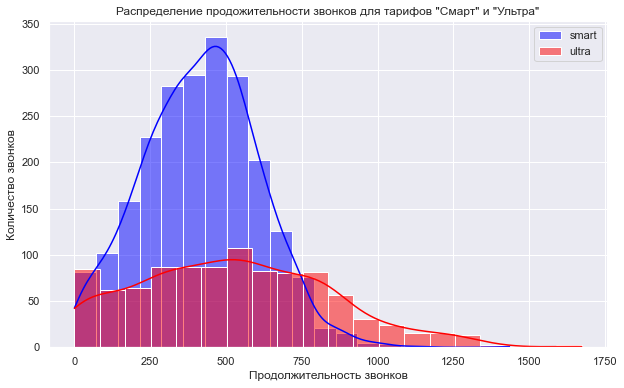

In [45]:
histogram('calls_duration',
          'Продолжительность звонков', 
          'Количество звонков', 
          'Распределение продожительности звонков для тарифов "Смарт" и "Ультра"'
         )

Построим гистограмму для интернет-трафика:

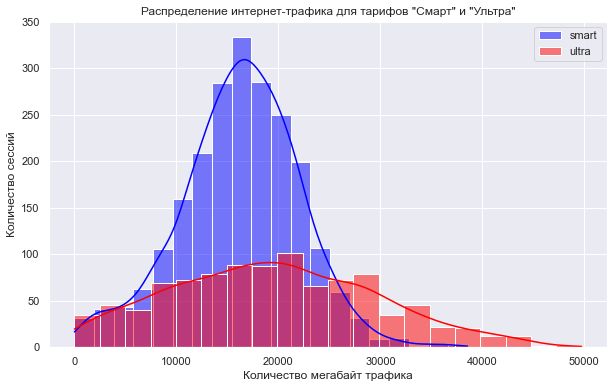

In [46]:
histogram('mb_used',
          'Количество мегабайт трафика', 
          'Количество сессий', 
          'Распределение интернет-трафика для тарифов "Смарт" и "Ультра"'
         )

Построим гистограмму для смс-сообщений:

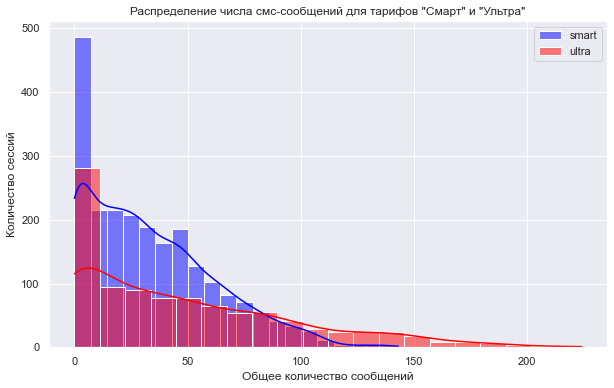

In [47]:
histogram('messages',
          'Общее количество сообщений', 
          'Количество сессий', 
          'Распределение числа смс-сообщений для тарифов "Смарт" и "Ультра"'
         )

Из представленных выше графиков можем видеть, что для всех трех показателей дисперсия и размах "усов" у тарифа "Ультра" больше, чем у тарифа "Смарт". При этом в тарифе "Ультра" на диаграме размаха наблюдается меньше выбросов. Также у тарифа "Ультра" показатели среднего значения и медианы сильнее смещены в сторону увеличения значений по сравнению с тарифом "Смарт". 

В показателях звонков и трафика распределения стремятся к нормальному, но имеют длинные выраженные "хвосты" в правой части. Распределение по смс-сообщениям имеет ярко выраженный скос вправо. 

**Вывод**

Мы выяснили, что за 2018 год пользователи тарифа "Смарт" принесли компании 2.8 млн. руб., а пользователи тарифа "Ультра" - 1.9 млн. руб.

Мы провели анализ наших данных и рассмотрели статические характеристики для продолжительности звонков, количества использованного интернет трафика и количества отправленных смс-сообщений.

В результате мы сделали следующие выводы:
* Средняя продолжительность разговоров в месяц: "Смарт" - 423 минуты, "Ультра" - 528 минут.
* Среднее количество используемого трафика в месяц: "Смарт - 16 Гб, "Ультра" - 19 Гб.
* Среднее количество отправленных смс-сообщений в месяц: "Смарт - 28, "Ультра" - 39.
* Дисперсии тарифа "Ультра" больше, чем у тарифа "Смарт, это говорит нам о большем размахе значений.

Пользователи тарифа "Ультра" более активно пользуются услугами мобильного оператора, при этом в среднем не выходя за пределы тарифа. Пользователям тарифа "Смарт" в среднем приходится докупать 1 Гб интернет-трафика сверх тарифного лимита.

Построение графиков по ключевым показателям позволило нам увидеть следующие закономерности:
* Пользователи тарифа "Ультра" являются более активными пользователями, дисперсия значений (звонки, трафик, смс) у этого тарифа больше, чем у тарифа "Ультра". При этом можем отметить, что пользователи тарифа "Ультра" практически никогда не выходят за пределы тарифного плана.  
* Большее количество выбросов у тарифа "Смарт" указывает нам на тех пользователей, которым больше подошел бы тариф "Ультра".

<a id="step6"></a>
## Проверка гипотез

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Для проверки гипотезы примем следующее: 

H0 (нулевая гипотеза)  -  средняя выручка пользователей тарифа "Ультра" равна средней выручке пользователей тарифа "Смарт".

H1 (альтернативная гипотеза)  - средние выручки пользователей тарифов "Ультра" и "Смарт" отличаются.

Уровень значимости α примем равным 0.5%.

In [48]:
alpha=.05

Сделаем 2 таблицы, в которых сохраним данные пользователей тарифов "Смарт" и "Ультра": 

In [49]:
smart = total[total['tariff_name'] == 'smart']['total_income']
ultra = total[total['tariff_name'] == 'ultra']['total_income']

Напишем функцию, в которой будем проверять дисперсии выборок (зададим степень свободы равную единице, поскольку работаем с выборками из генеральной совокупности) и использовать ttest_ind для для проверки гипотезы о равенстве среднего двух независимых выборок (уровень значимости критерия Стьюдента для независимых выборок, т.к. средние выручки выборок не зависят друг от друга):

In [50]:
def test(df1, df2):
    print('Дисперсия 1:', df1.var(ddof=1))
    print('Дисперсия 2:', df2.var(ddof=1))
    
    results = st.ttest_ind(
    df1, 
    df2, 
    equal_var=False)

    print('p-значение:', results.pvalue)

    if results.pvalue < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

Проверим нулевую гипотезу, используя написанную раннее функцию:

In [51]:
test(smart, ultra)

Дисперсия 1: 669785.7080064153
Дисперсия 2: 141516.745078617
p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Мы отвергаем нулевую гипотезу о том, что средние выручки пользователей тарифов "Ультра" и "Смарт" равны.

**Вывод**

Мы приняли нулевую гипотезу о том, что средняя выручка пользователей тарифа "Ультра" равна средней выручке пользователей тарифа "Смарт".
В качестве альтернативной гипотезы мы приняли утвержение о том, средние выручки пользователей тарифов "Ультра" и "Смарт" отличаются.

Мы отвергли нулевую гипотезу о том, что средние выручки пользователей тарифов "Ультра" и "Смарт" равны, и сделали вывод о том, что средняя выручка пользователя тарифа "Смарт" и тарифа "Ультра" отличаются.

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Для проверки гипотезы примем следующее: 

H0 (нулевая гипотеза)  -  средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

H1 (альтернативная гипотеза) - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Уровень значимости α примем равным 0.5%.

In [52]:
alpha=.05

Сделаем 2 таблицы, в которых сохраним данные пользователей из Москвы и из других регионов: 

In [53]:
moscow = total.query('city == "Москва"')['total_income']
not_moscow = total.query('city != "Москва"')['total_income']

Проверим нулевую гипотезу, используя написанную раннее функцию:

In [54]:
test(moscow, not_moscow)

Дисперсия 1: 565636.4670118855
Дисперсия 2: 654137.6285218045
p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Нам не удалось отвергнуть нулевую гипотезу, что говорит о том, что с вероятностью 44%, сравнивая средние выручки, мы бы получали схожие значения.

Посчитаем средние выручки:

**Вывод**

Мы приняли нулевую гипотезу о том, что средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.
В качестве альтернативной гипотезы мы приняли утвержение о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Нам не удалось отвергнуть нулевую гипотезу, о том, что средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов, поэтому мы сделали вывод о том, сравнивая средние выручки, мы бы получали схожие значения.

<a id="step7"></a>
## Общий вывод

Мы провели исследование двух тарифных планов оператора сотовой "Мегалайн" - тарифы "Смарт" и "Ультра". В нашем распоряжении были данные за 2018 год о звонках, отправленных смс-сообщениях, сессиях интернет-трафика 500 абонентов.

Для проведения анализа мы рассчитали для каждого пользователя по месяцам количество и продолжительность звонков, количество использованного интернет трафика и количество смс-сообщений. Также с помощью функции revenue мы рассчитали выручку, которую принес в каждом месяце каждый отдельный абонент. Так мы выяснили, что за 2018 год пользователи тарифа "Смарт" принесли компании 2.8 млн. руб., а пользователи тарифа "Ультра" - 1.9 млн. руб.

На этапе анализа данных мы рассмотрели статические характеристики для продолжительности звонков, количества использованного интернет трафика и количества отправленных смс-сообщений. Это позволило нам сделать следующие выводы:

* Средняя продолжительность разговоров в месяц: "Смарт" - 423 минуты, "Ультра" - 528 минут.
* Среднее количество используемого трафика в месяц: "Смарт - 16 Гб, "Ультра" - 19 Гб.
* Среднее количество отправленных смс-сообщений в месяц: "Смарт - 28, "Ультра" - 39.
* Дисперсии тарифа "Ультра" больше, чем у тарифа "Смарт, это говорит нам о большем размахе значений.

Мы построили диаграммы размаха и гистограммы для звонков, трафика и количества смс-сообщений для двух тарифов и в результате выявили, что у абонентов трафика "Ультра" размах значений шире, а это значит, что эти пользователи более активно используют услуги мобильного оператора. Большее количество выбросов у тарифа "Смарт" может указывать нам на тех пользователей, которым больше подошел бы тариф "Ультра".

Пользователи тарифа "Ультра" более активно пользуются услугами мобильного оператора, при этом в среднем не выходя за пределы тарифа. Пользователям тарифа "Смарт" в среднем приходится докупать 1 Гб интернет-трафика сверх тарифного лимита.

Также мы провели статистический анализ, в котором проверили 2 гипотезы:

* Первая нулевая гипотеза: средняя выручка пользователей тарифа "Ультра" равна средней выручке пользователей тарифа "Смарт". Альтернативная гипотеза: средние выручки пользователей тарифов "Ультра" и "Смарт" отличаются.

* Вторая нулевая гипотеза: средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов. Альтернативная гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Поскольку средение выручки выборок не зависят друг от друга, мы использовали уровень значимости критерия Стьюдента для независимых выборок. 

В первом случае мы отвергли нулевую гипотезу и сделали вывод о том, что мы можем утверждать, что средняя выручка пользователя тарифа "Смарт" и тарифа "Ультра" отличаются.

Во втором случае нам не удалось отвергнуть нулевую гипотезу, поэтому мы сделали вывод о том, сравнивая средние выручки, мы бы получали схожие значения.

Сравнивая прибыль, мы выяснили, что за 2018 год пользователи тарифа "Смарт" принесли компании 2.8 млн. руб., а пользователи тарифа "Ультра" - 1.9 млн. руб. Но при этом средняя выручка от тарифа "Смарт" составляет 1290 руб., тогда как пользователи тарифа "Ультра" составляет 2070 руб. Абоненты тарифа "Ультра" практически не выходят за рамки лимитов, но при этом оплачивают абнентскую плату в размере 1950 руб. Абонентам тарифа "Смарт", как правило, приходтся дополнительно оплачивать звонки и интернет трафик сверх тарифного плана, абонентская плата которого составляет 550 руб. 

В результате исследования мы можем сделать, что тариф "Ультра" является более коммерчески прибыльным, поскольку средняя выручка, которую он приносит компании, больше, чем у тарифа "Смарт". При этом стоит отметить, что тариф "Смарт" своими условиями может привлекать пользователей, и в рамках обозначенных лимитов приводит к тому, что пользователи докупают дополнительные услуги по более высоким тарифам, чем на тарифе "Смарт", что также увеличивает выручку компании. 